In [15]:
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [4]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(),
                          download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 42490792.96it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1224916.77it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9650534.37it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7759889.52it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [19]:
batch_size=100

train_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=False, drop_last=False)

In [20]:
train_epochs = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.nn.Sequential(
    torch.nn.Linear(28 * 28, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 10)
).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(train_epochs):
  for X,Y in train_loader:
    X = X.view(-1, 28 * 28). to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{train_epochs}], Loss: {loss.item():.4f}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch [2/10], Loss: 0.0883
Epoch [2/10], Loss: 0.0652
Epoch [2/10], Loss: 0.0535
Epoch [2/10], Loss: 0.1001
Epoch [2/10], Loss: 0.0488
Epoch [2/10], Loss: 0.1565
Epoch [2/10], Loss: 0.0723
Epoch [2/10], Loss: 0.2270
Epoch [2/10], Loss: 0.0933
Epoch [2/10], Loss: 0.0852
Epoch [2/10], Loss: 0.0762
Epoch [2/10], Loss: 0.1173
Epoch [2/10], Loss: 0.1273
Epoch [2/10], Loss: 0.1302
Epoch [2/10], Loss: 0.1627
Epoch [2/10], Loss: 0.0754
Epoch [2/10], Loss: 0.0981
Epoch [2/10], Loss: 0.0683
Epoch [2/10], Loss: 0.0748
Epoch [2/10], Loss: 0.1447
Epoch [2/10], Loss: 0.0930
Epoch [2/10], Loss: 0.1920
Epoch [2/10], Loss: 0.0764
Epoch [2/10], Loss: 0.0982
Epoch [2/10], Loss: 0.0843
Epoch [2/10], Loss: 0.0965
Epoch [2/10], Loss: 0.1643
Epoch [2/10], Loss: 0.0759
Epoch [2/10], Loss: 0.1246
Epoch [2/10], Loss: 0.1267
Epoch [2/10], Loss: 0.0486
Epoch [2/10], Loss: 0.1681
Epoch [2/10], Loss: 0.1727
Epoch [2/10], Loss: 0.1239
Epoch [2/10], Loss: 0.0873
Epoch [2/10], Loss:



*   1 Epoch: 1 forward pass & backward pass of all the training examples
*   bath_size: the number of training examples in 1 forward & backward pass. The higher the batch size, the more memory space need.
*   number of iterations: number of passes, each pass using batch_size of examples. 1 pass = 1 forward pass + 1 backward pass




Softmax

In [23]:
linear = torch.nn.Linear(784, 10, bias=True).to(device)

training_epochs = 15
batch_size = 100
#pytorch에서 CrossEntropyLoss가 Softmax를 계산해준다.
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1)

for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(train_loader)
  for X,Y in train_loader:
    X = X.view(-1, 28 * 28). to(device)
    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    avg_cost += cost / total_batch

  print("Epoch: ", "%04d" % (epoch+1), "cost =","{:.9f}".format(avg_cost))

Epoch:  0001 cost = 0.535136938
Epoch:  0002 cost = 0.358968079
Epoch:  0003 cost = 0.330853820
Epoch:  0004 cost = 0.316442668
Epoch:  0005 cost = 0.306933075
Epoch:  0006 cost = 0.300231516
Epoch:  0007 cost = 0.295137167
Epoch:  0008 cost = 0.290658355
Epoch:  0009 cost = 0.287327379
Epoch:  0010 cost = 0.284323007
Epoch:  0011 cost = 0.281925470
Epoch:  0012 cost = 0.279606462
Epoch:  0013 cost = 0.277696729
Epoch:  0014 cost = 0.275824159
Epoch:  0015 cost = 0.274421841


Test

In [24]:
with torch.no_grad(): #gradient를 계산 안함
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print("Accuracy: ", accuracy.item())


Accuracy:  0.8877000212669373


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Visualization

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label:  9
Prediction =  4


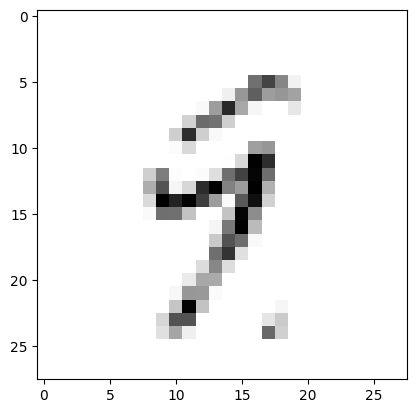

In [25]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction = ",torch.argmax(single_prediction,1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap="Greys", interpolation="nearest")
plt.show()
